In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,f1_score,recall_score, accuracy_score,precision_score
from sklearn.metrics import confusion_matrix

# Chagement des donnees

In [10]:
df=pd.read_csv('Thyroid_Diff.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


## Analyse et Exploration des Donnees

**Analyse de forme**

- Variable targe: Recurred
- lignes et colonnees: (383, 17)
- types de variables: 16 variables qualitatives et une quantitative
- Analyse des valeurs manquantes: pas de valeurs manquantes

In [4]:
df.shape

(383, 17)

In [5]:
df.dtypes.value_counts()

object    16
int64      1
Name: count, dtype: int64

<Axes: ylabel='count'>

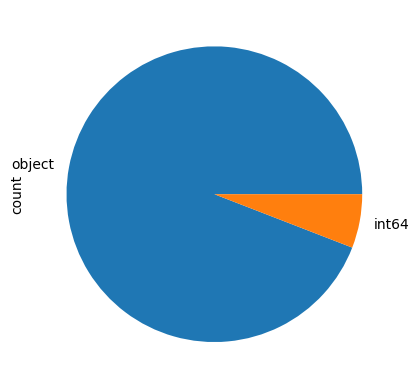

In [6]:
df.dtypes.value_counts().plot.pie()

<Axes: >

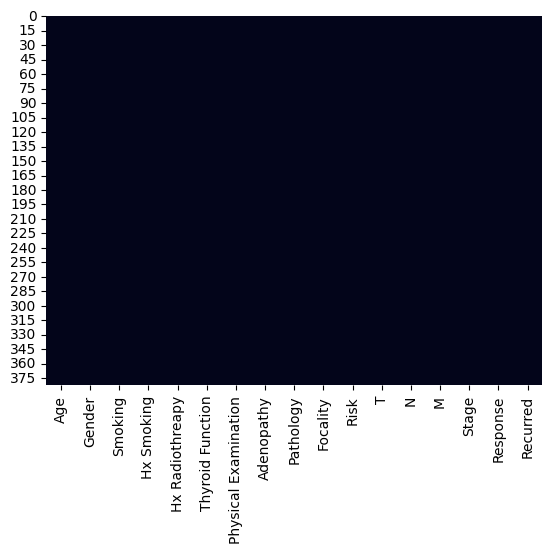

In [7]:
sns.heatmap(df.isna(), cbar=False)

In [8]:
df.isna().sum()/df.shape[0]

Age                     0.0
Gender                  0.0
Smoking                 0.0
Hx Smoking              0.0
Hx Radiothreapy         0.0
Thyroid Function        0.0
Physical Examination    0.0
Adenopathy              0.0
Pathology               0.0
Focality                0.0
Risk                    0.0
T                       0.0
N                       0.0
M                       0.0
Stage                   0.0
Response                0.0
Recurred                0.0
dtype: float64

**Analyse de fond**

- Vaisualisation de la  target: 
   - 28% de cas recurrents
- Signification des variables: 

- relation variables/Target:


**Examen de la variable target**

In [9]:
df['Recurred'].value_counts(normalize=True)

Recurred
No     0.718016
Yes    0.281984
Name: proportion, dtype: float64

**Histogramme des variable continues**

C:\Users\HP\AppData\Local\Temp\ipykernel_3304\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

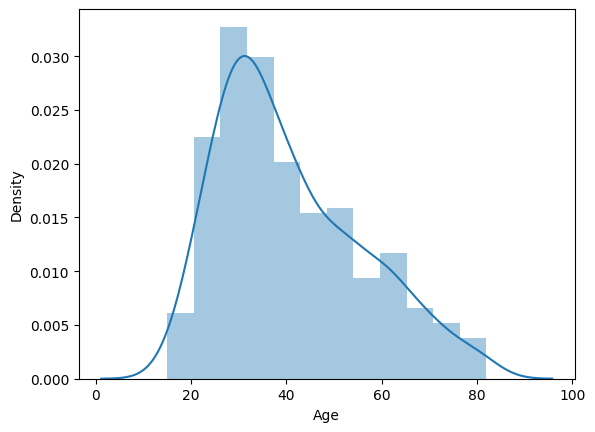

In [10]:
sns.distplot(df['Age'])

**Variables qualitatives**

In [11]:
for col in df.select_dtypes('object'): 
    print(f'{col :-<50} {df[col].unique()}')


Gender-------------------------------------------- ['F' 'M']
Smoking------------------------------------------- ['No' 'Yes']
Hx Smoking---------------------------------------- ['No' 'Yes']
Hx Radiothreapy----------------------------------- ['No' 'Yes']
Thyroid Function---------------------------------- ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
Physical Examination------------------------------ ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
Adenopathy---------------------------------------- ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
Pathology----------------------------------------- ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
Focality------------------------------------------ ['Uni-Focal' 'Multi-Focal']
Risk---------------------------------------------- ['Low' 'Intermediate' 'High']
T----------------------------

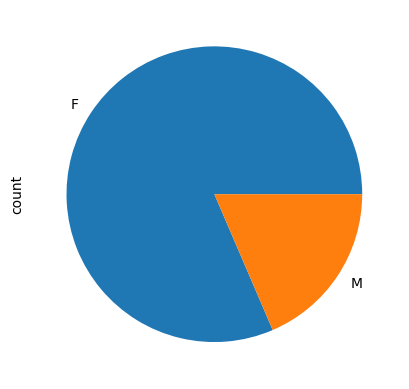

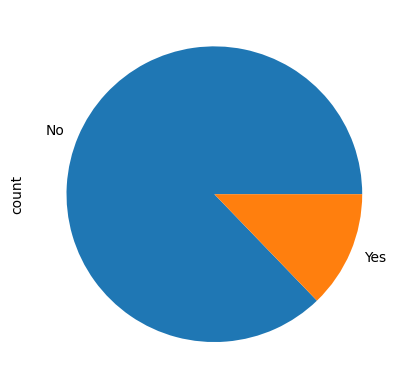

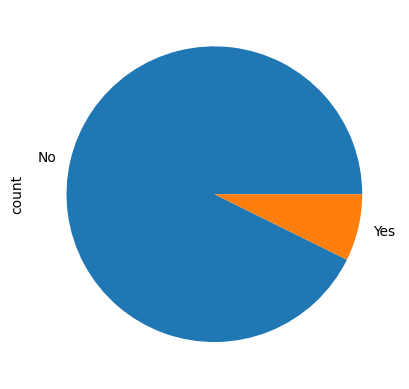

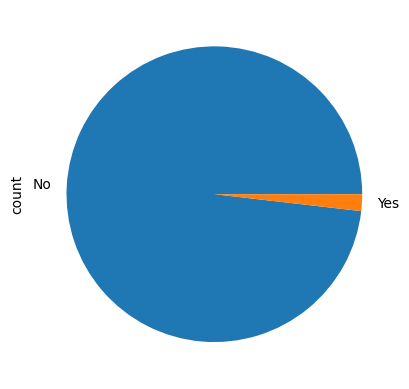

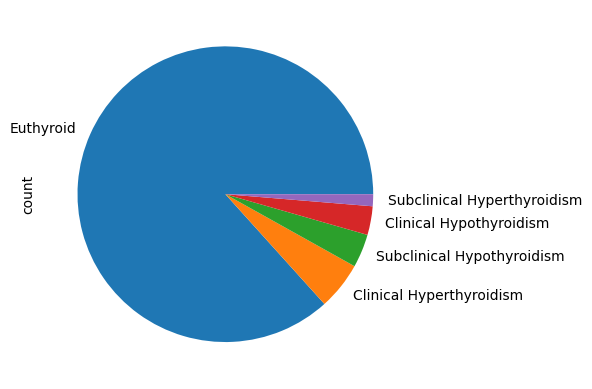

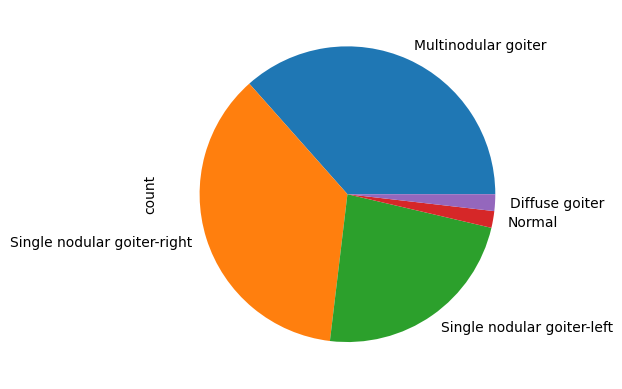

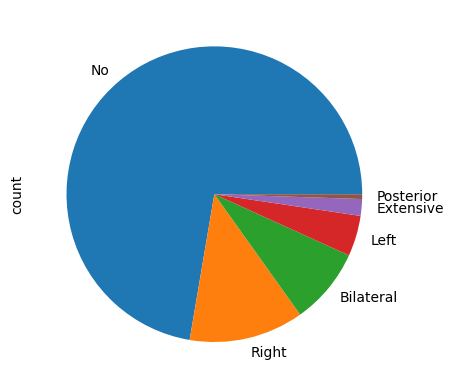

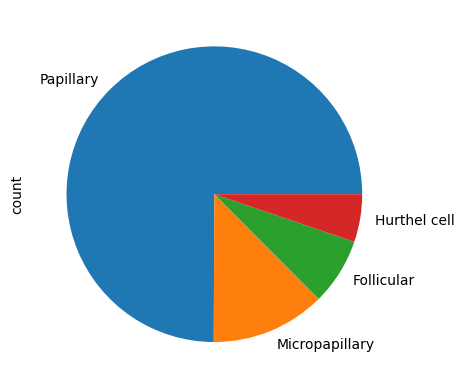

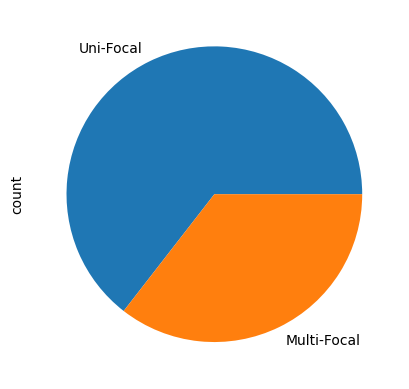

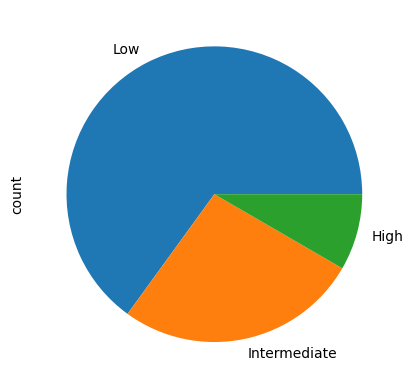

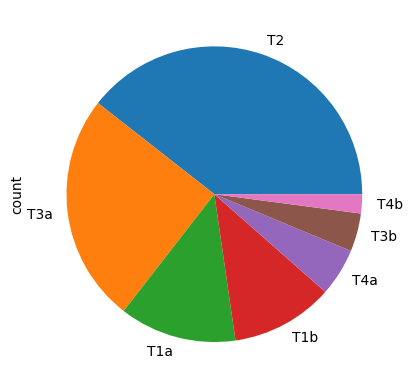

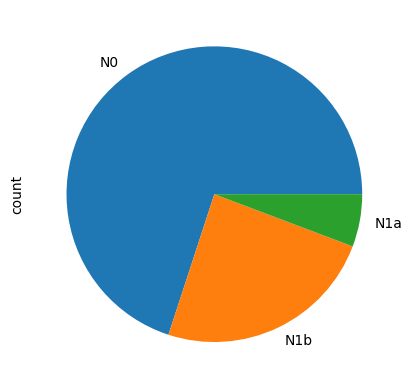

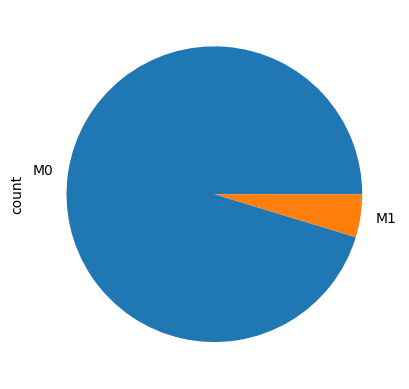

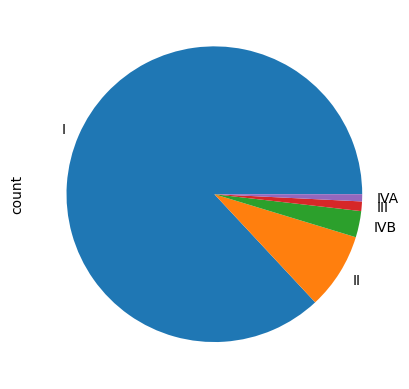

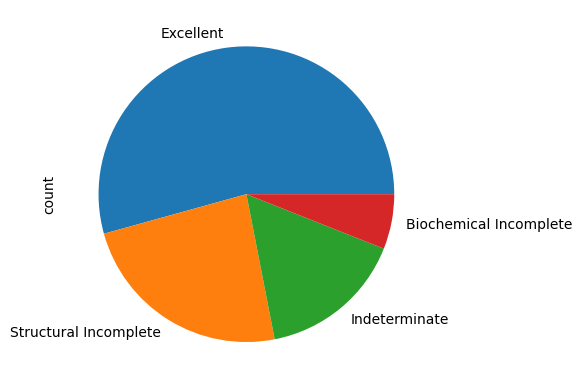

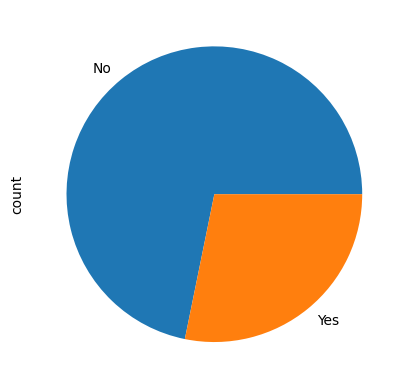

In [12]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()


**Relation variables/target**

*Creation de sous_ensembles no et yes*

In [13]:
no_recurred=df[df['Recurred']=='No']
yes_recurred=df[df['Recurred']=='Yes']

**Relation Target/Age**

In [16]:
df['Age_cat']=pd.cut(df['Age'],bins=[10,20,30,40,50,60,70,80])
df1=df.copy()
df1['Age']=df1['Age_cat']


<Axes: xlabel='Age', ylabel='count'>

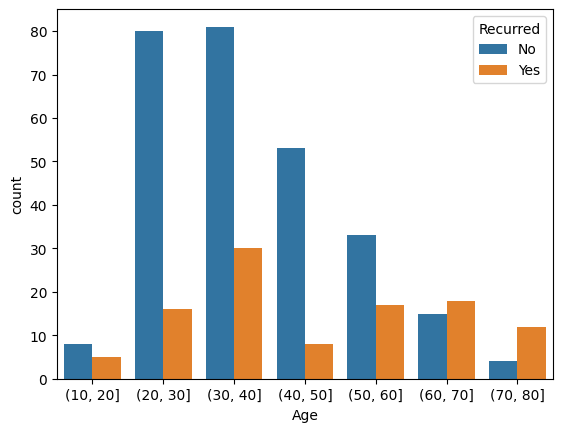

In [17]:
sns.countplot(x='Age',hue='Recurred',data=df1)

**relation target/categorielle

In [ ]:
cat=(df.drop(['Recurred'],axis=1).select_dtypes('object'))
cat

,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate
1,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
2,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
3,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
4,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete
379,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete
380,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete
381,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete


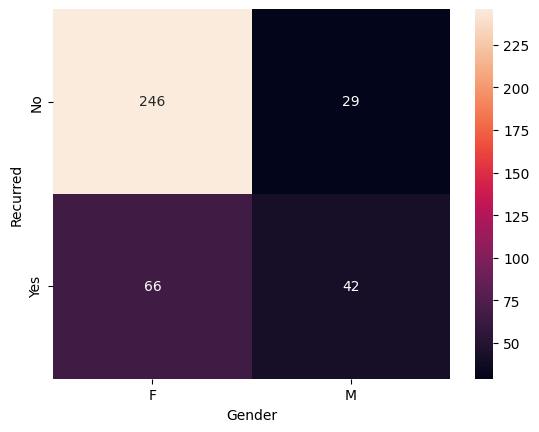

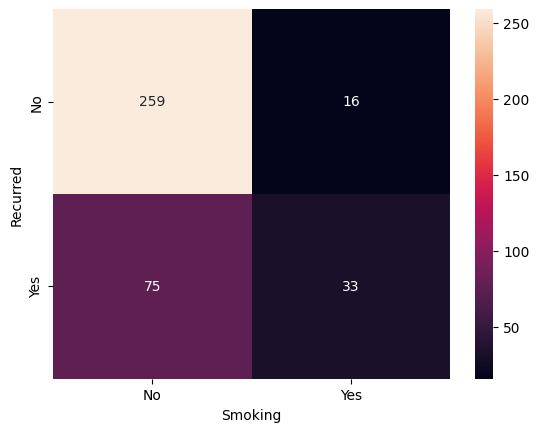

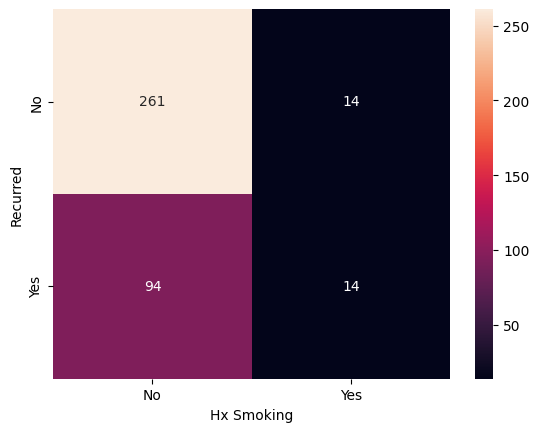

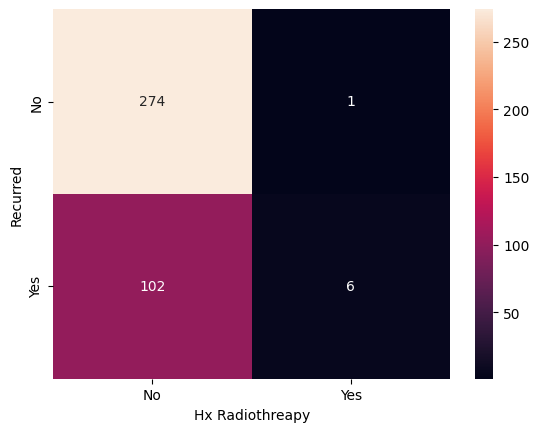

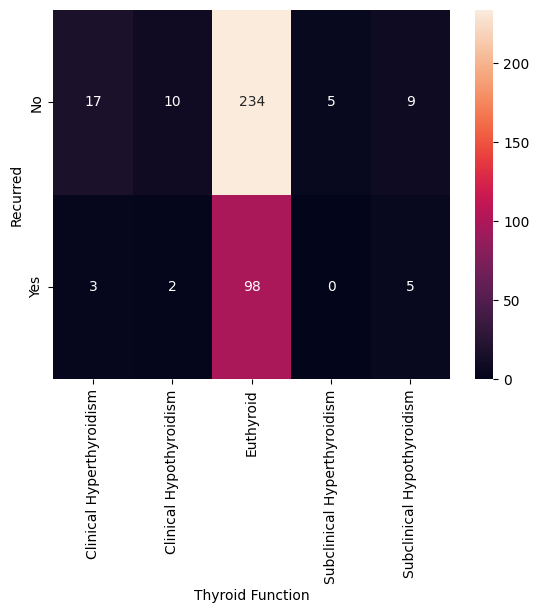

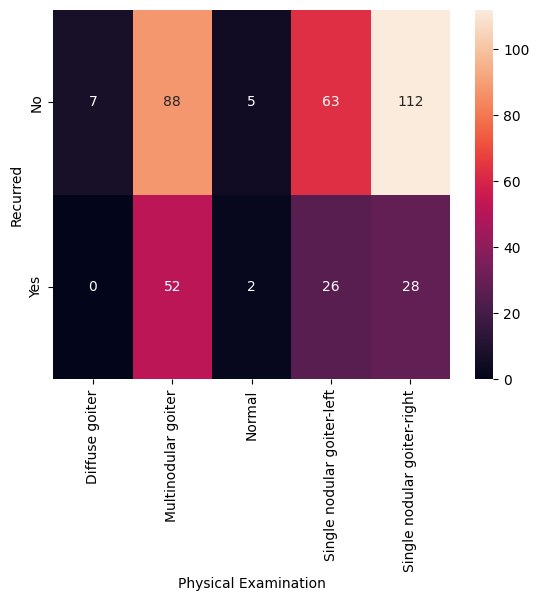

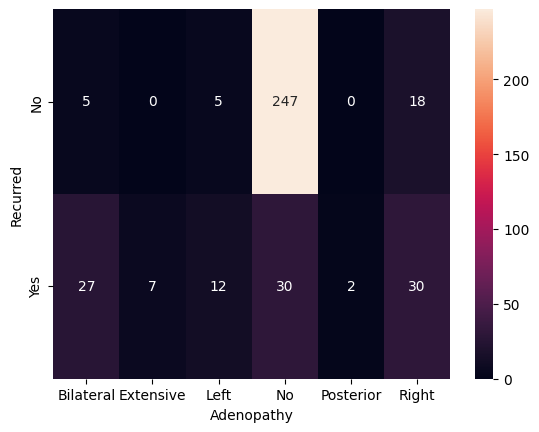

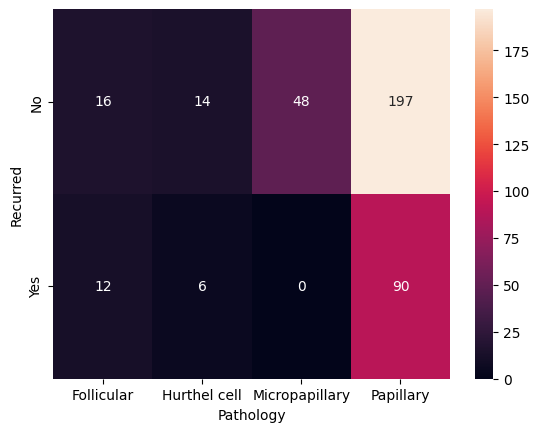

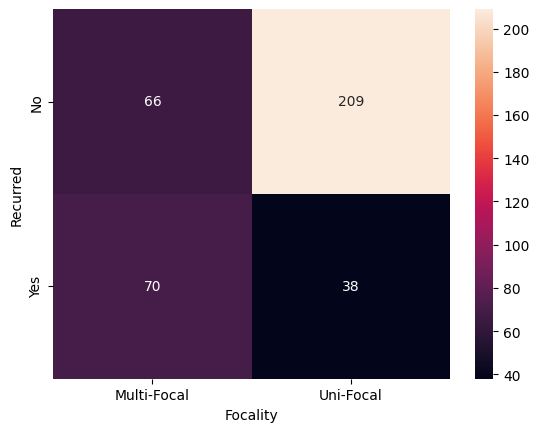

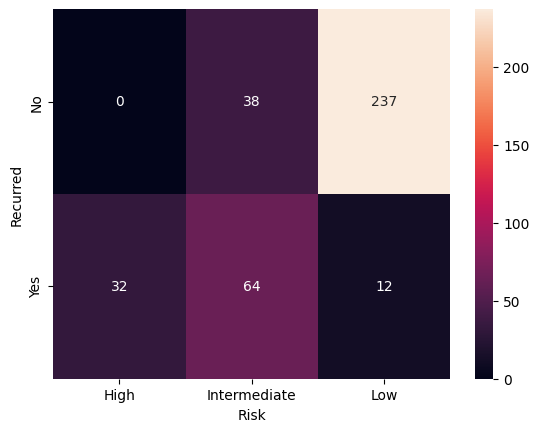

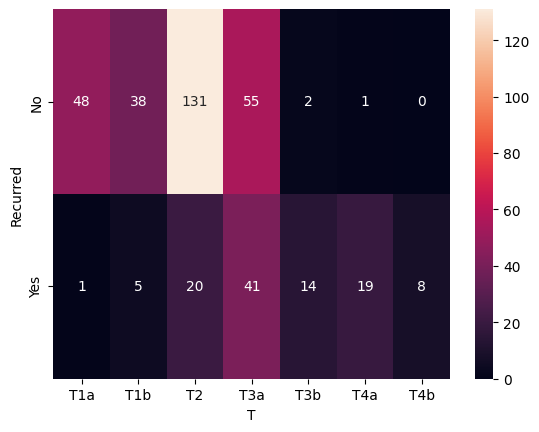

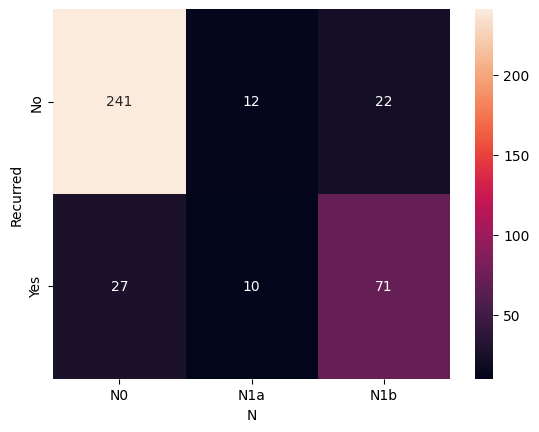

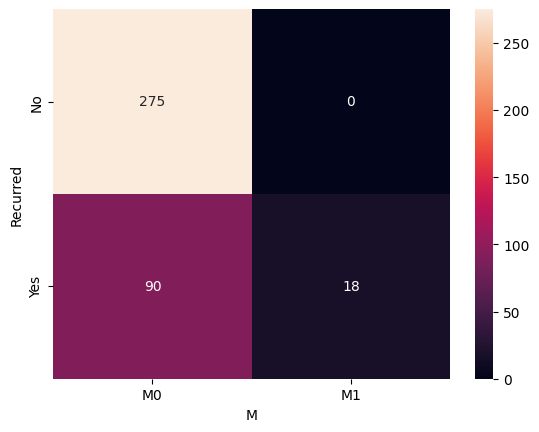

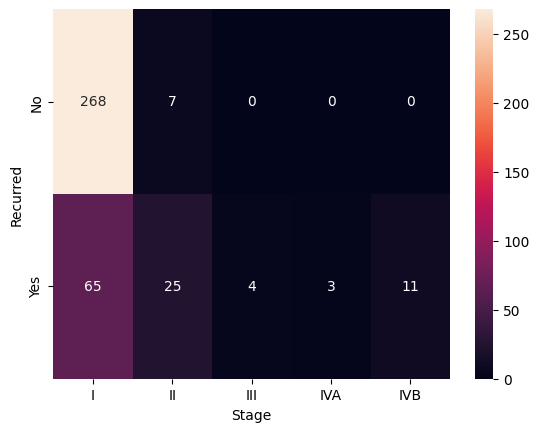

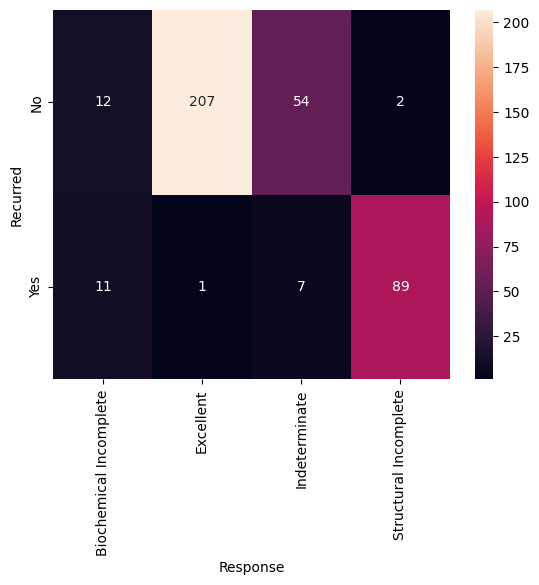

In [ ]:
for col in cat.columns:
  plt.figure()
  sns.heatmap(pd.crosstab(df['Recurred'],cat[col]),annot=True,fmt='d')

In [19]:
df=df.drop('Age_cat',axis=1)

## Preprocessing des donnees

In [20]:
trainset,testset=train_test_split(df,test_size=0.2,random_state=0)

In [21]:
trainset['Recurred'].value_counts()

Recurred
No     224
Yes     82
Name: count, dtype: int64

In [ ]:
testset['Recurred'].value_counts()

Recurred
No     51
Yes    26
Name: count, dtype: int64

**Encodage**

In [23]:
LE=LabelEncoder()
for col in df.columns:
    df[col]=LE.fit_transform(df[col])

In [24]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,11,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,18,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,14,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,46,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,46,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,56,1,1,1,1,2,4,5,3,1,0,6,2,1,4,0,1
379,63,1,1,0,1,2,1,1,3,0,0,6,2,1,4,3,1
380,56,1,1,1,0,2,1,0,3,0,0,6,2,1,4,3,1
381,45,1,1,1,1,0,1,1,1,0,0,6,2,0,3,3,1


In [25]:
X=df.drop('Recurred',axis=1)
y=df['Recurred']

In [26]:
scaler=StandardScaler()
X_norm=scaler.fit_transform(X)

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.2,random_state=0)

# Apprentissage

-  **Random forest**

In [28]:
model_rf=RandomForestClassifier()
params_grid_rf=({'n_estimators' : [50,70,90],
                 'max_features' : [3,5,7,9,11],
                 'max_depth' : [2,5,7,8,9],
                 'min_samples_leaf': [4,5,7,9,11]}

)
model_rf_opt=GridSearchCV(model_rf,params_grid_rf,cv=5)
# Entrainement (fit) du modele
model_rf_opt.fit(X_train,y_train)
# Le meilleur modele
best_model_RF = model_rf_opt.best_estimator_




In [29]:
y_pred_RF = best_model_RF.predict(X_test)
best_model_RF

RandomForestClassifier(max_depth=5, max_features=9, min_samples_leaf=4,
                       n_estimators=50)

-  Adaboosting

In [30]:
model_Aboost=AdaBoostClassifier()
params_grid_Aboost=({
    'n_estimators' : [50,70,90],
    'learning_rate':[0.4,0.7,1]
    })
model_Aboost_opt=GridSearchCV(model_Aboost,params_grid_Aboost,cv=5)
# Entrainement (fit) du modele
model_Aboost_opt.fit(X_train,y_train)
# Le meilleur modele
best_model_Aboost = model_Aboost_opt.best_estimator_

y_pred_Aboost = best_model_Aboost.predict(X_test)


In [31]:
best_model_Aboost

AdaBoostClassifier(learning_rate=0.4, n_estimators=70)

-  **Regression Logistique**

In [36]:
# Initialisation du modele
model_LR = LogisticRegression()
# choix des parametres
param_grid_LR = ({'max_iter' : [200,500,700,1000]
               }
                 )
# Modele optimal
model_LR_opt = GridSearchCV(model_LR,
                            param_grid_LR,
                            cv = 5
                            )
# Entrainement (fit) du modele
model_LR_opt.fit(X_train,y_train)
# Le meilleur modele
best_model_LR = model_LR_opt.best_estimator_
# ou bien utiliser l'accuracy pour calculer le score
y_pred_LR = best_model_LR.predict(X_test)

-  **SVM**

In [37]:
model_svm=SVC()
param_grid_SVC=({

    "degree": [3,5,7,9,11,13],
    "C": [0.4,0.5,0.7,1]

})
model_SVC_opt=GridSearchCV(model_svm,param_grid_SVC,cv=5)
# Entrainement (fit) du modele
model_SVC_opt.fit(X_train,y_train)
# Le meilleur modele
best_model_SVC = model_SVC_opt.best_estimator_
# ou bien utiliser l'accuracy pour calculer le score
y_pred_SVC = best_model_SVC.predict(X_test)


In [35]:
best_model_SVC

SVC(C=1)

# Evaluation

In [38]:
def metrics(y_test,y_pred):
    print("accuracy: {: .3f}".format(accuracy_score(y_test,y_pred)))
    print("recall: {: .3f}".format(recall_score(y_test,y_pred)))
    print("precision: {: .3f}".format(precision_score(y_test,y_pred)))
    print("f1_score: {: .3f}".format(f1_score(y_test,y_pred)))
    print("classification_report",classification_report(y_test,y_pred_LR))
    return metrics

In [40]:
print("classification_report",classification_report(y_test,y_pred_LR))


classification_report               precision    recall  f1-score   support

           0       0.94      0.94      0.94        51
           1       0.88      0.88      0.88        26

    accuracy                           0.92        77
   macro avg       0.91      0.91      0.91        77
weighted avg       0.92      0.92      0.92        77



In [41]:
print("Evaluation du modèle random forest")
print()
metrics(y_test, y_pred_RF)

Evaluation du modèle random forest

accuracy:  0.922
recall:  0.846
precision:  0.917
f1_score:  0.880
classification_report               precision    recall  f1-score   support

           0       0.94      0.94      0.94        51
           1       0.88      0.88      0.88        26

    accuracy                           0.92        77
   macro avg       0.91      0.91      0.91        77
weighted avg       0.92      0.92      0.92        77



<function __main__.metrics(y_test, y_pred)>

In [42]:
print("Evaluation du modèle adaboost")
print()
metrics(y_test, y_pred_Aboost)

Evaluation du modèle adaboost

accuracy:  0.922
recall:  0.846
precision:  0.917
f1_score:  0.880
classification_report               precision    recall  f1-score   support

           0       0.94      0.94      0.94        51
           1       0.88      0.88      0.88        26

    accuracy                           0.92        77
   macro avg       0.91      0.91      0.91        77
weighted avg       0.92      0.92      0.92        77



<function __main__.metrics(y_test, y_pred)>

In [43]:
print("Evaluation du modèle regression logistique")
print()
metrics(y_test, y_pred_LR)

Evaluation du modèle regression logistique

accuracy:  0.922
recall:  0.885
precision:  0.885
f1_score:  0.885
classification_report               precision    recall  f1-score   support

           0       0.94      0.94      0.94        51
           1       0.88      0.88      0.88        26

    accuracy                           0.92        77
   macro avg       0.91      0.91      0.91        77
weighted avg       0.92      0.92      0.92        77



<function __main__.metrics(y_test, y_pred)>

In [44]:
print("Evaluation du modèle SVM")
print()
metrics(y_test, y_pred_SVC)

Evaluation du modèle SVM

accuracy:  0.922
recall:  0.846
precision:  0.917
f1_score:  0.880
classification_report               precision    recall  f1-score   support

           0       0.94      0.94      0.94        51
           1       0.88      0.88      0.88        26

    accuracy                           0.92        77
   macro avg       0.91      0.91      0.91        77
weighted avg       0.92      0.92      0.92        77



<function __main__.metrics(y_test, y_pred)>

# Matrice de confusion

In [45]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

- Matrice de confusion pour ranfom forest

Confusion matrix, without normalization


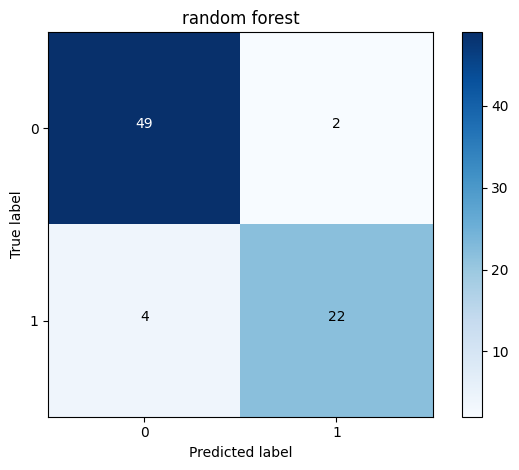

In [46]:
confusion_matrix_rf = confusion_matrix(y_test,y_pred_RF)
plot_confusion_matrix(confusion_matrix_rf, classes=[0, 1], title= "random forest")

Confusion matrix, without normalization


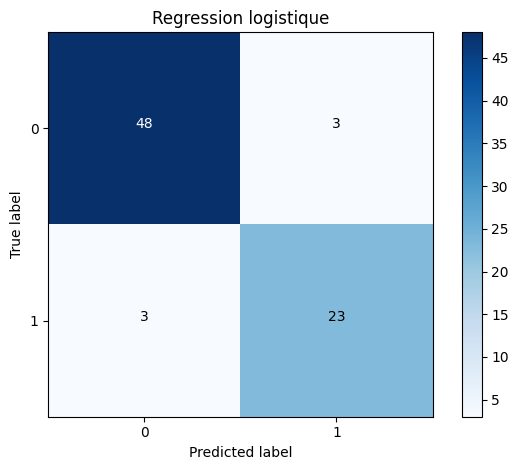

In [47]:
confusion_matrix_LR = confusion_matrix(y_test,y_pred_LR)
plot_confusion_matrix(confusion_matrix_LR, classes=[0, 1], title= "Regression logistique")

# Learning Curve

In [48]:
models= {"Random forest": RandomForestClassifier(),
         "Adaboosting": AdaBoostClassifier(),
         "Regression logistique": LogisticRegression(),
         "SVM": SVC()
         }

In [49]:
def plot_learning_curves(models, X_train, y_train, cv=5, scoring='f1'):
    
    for name, model in models.items(): 
        plt.figure(figsize=(12, 8))
        N, train_score, val_score=learning_curve(model,X_train,y_train,cv=cv,
                            scoring=scoring,train_sizes=np.linspace(0.1,1,10))

        plt.plot(N,train_score.mean(axis=1),label=f'train score - {name}')
        plt.plot(N,val_score.mean(axis=1),label=f'validation score - {name}' ,linestyle='dashed')
    
        plt.xlabel("Training Size")
        plt.ylabel(scoring.capitalize())
        plt.title(f"Learning Curves - {name}")
        plt.legend()
        plt.show()


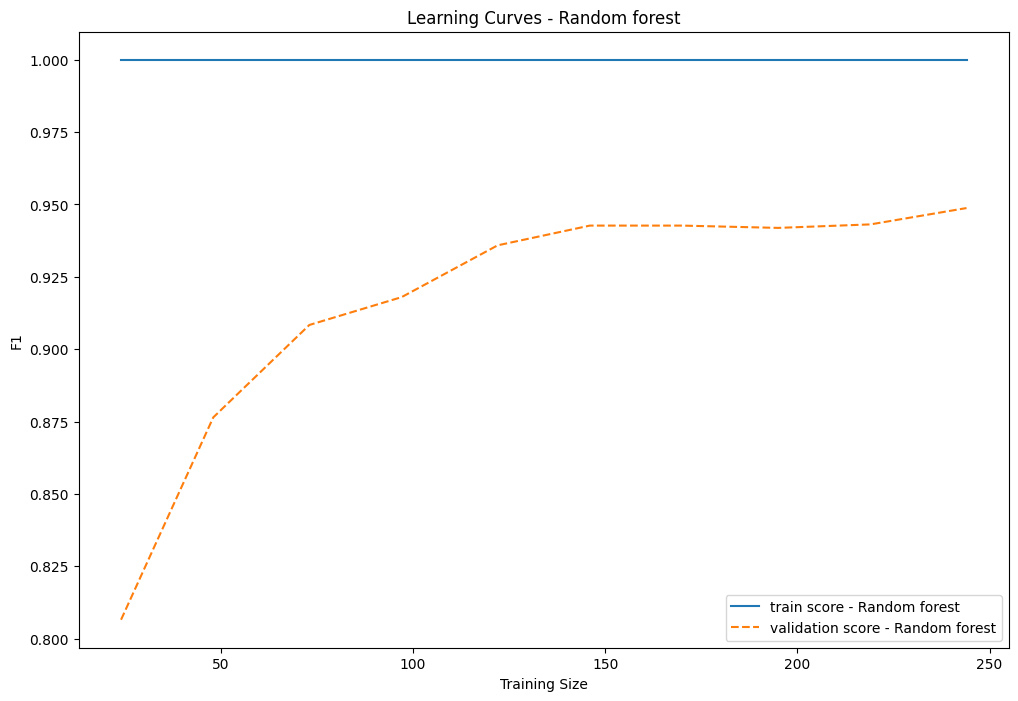

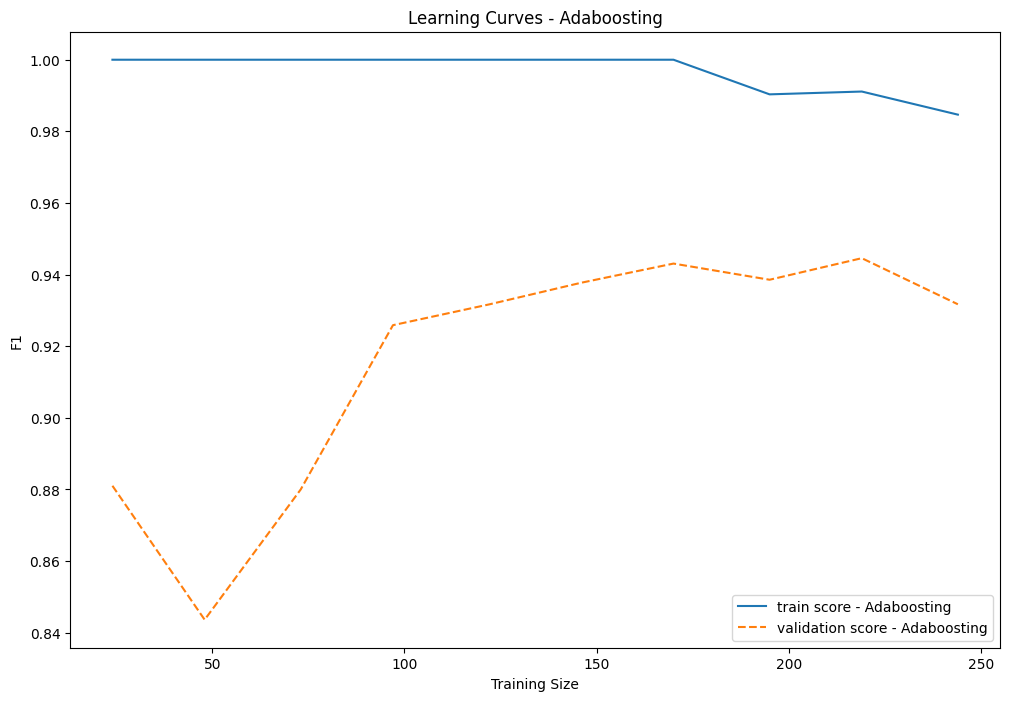

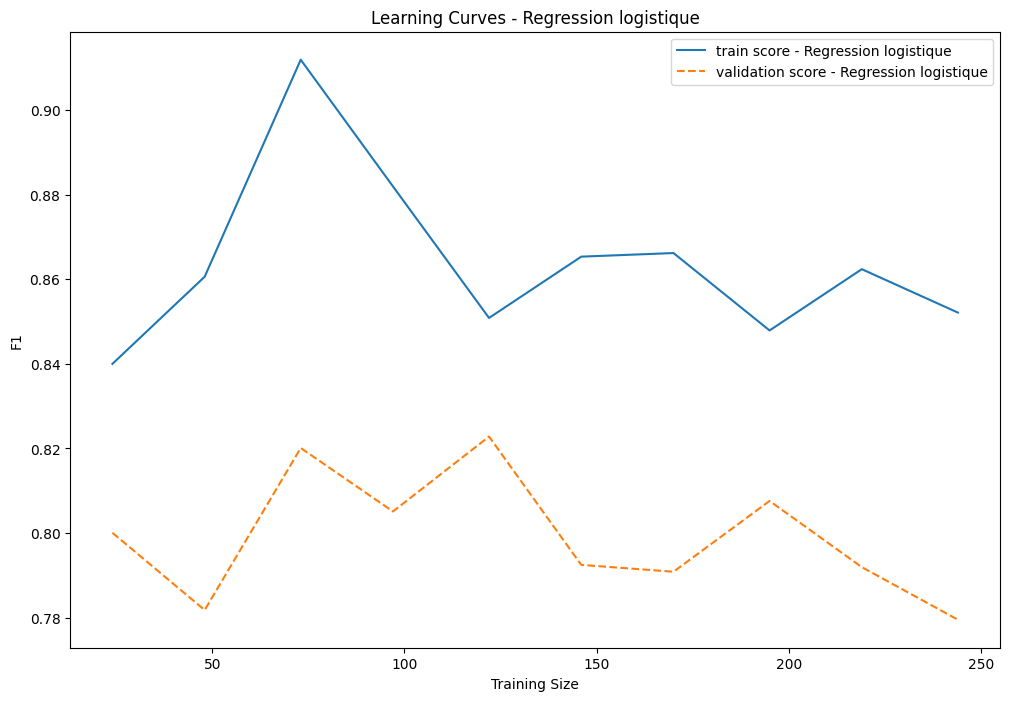

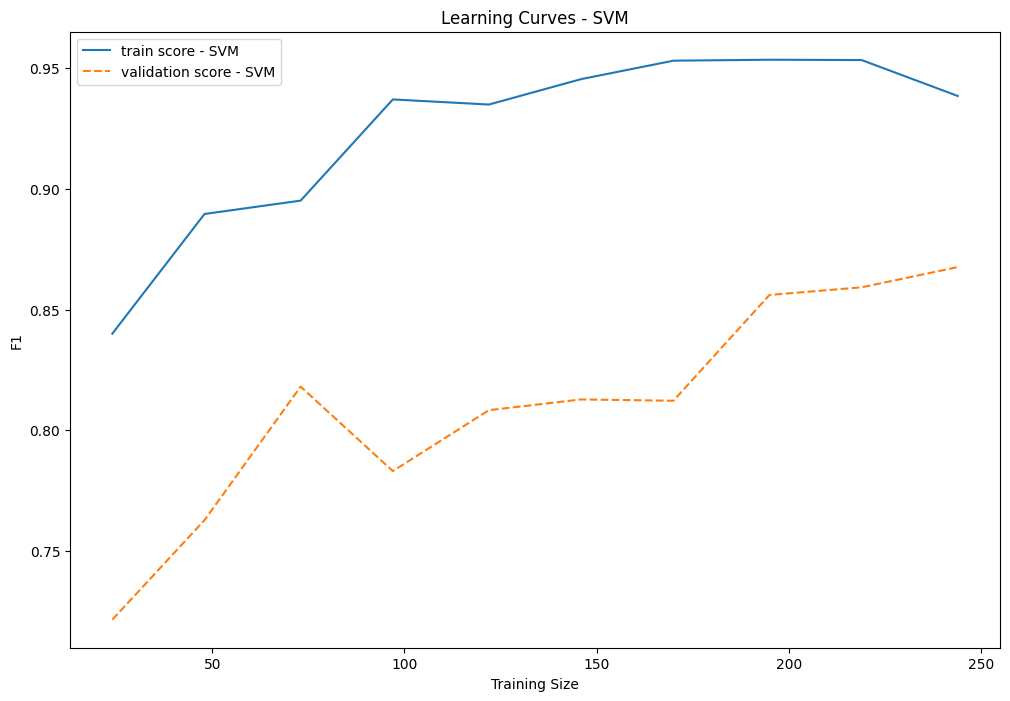

In [50]:
plot_learning_curves(models, X_train, y_train)

# Prediction

In [51]:

features=['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']
def recurred(best_model_SVC,features):
 X = np.array([features]).reshape(1,-1)
 print(best_model_SVC.predict(X))
 #print(best_model_SVC.predict_log_proba(X))

In [52]:
recurred(best_model_SVC,[29,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2])

[1]


# Enregistrement du meilleur modele

In [53]:
import pickle

filename = 'best_model.pkl' # choix du nom du fichier
pickle.dump(best_model_SVC, open(filename, 'wb'))

# Equilibrage des classes

In [54]:


from imblearn.over_sampling import SMOTE
X_r, y_r = SMOTE().fit_resample(X_norm, y)
print("dimension de X apres reequilibrage: ", X_r.shape)
print("dimension de Y apres reequilibrage: ", y_r.shape)



dimension de X apres reequilibrage:  (550, 16)
dimension de Y apres reequilibrage:  (550,)


In [55]:
y_r.value_counts()

Recurred
0    275
1    275
Name: count, dtype: int64

In [56]:

X_r_train,X_r_test,y_r_train,y_r_test = train_test_split(X_r, y_r, test_size= 0.2, random_state= 0)

- **Random foerst apres reequilibrage**

In [57]:
model_rf_equi=RandomForestClassifier()
params_grid_rf_equi=({'n_estimators' : [50,70,90],
                 'max_features' : [3,5,7,9,11],
                 'max_depth' : [2,5,7,8,9],
                 'min_samples_leaf': [4,5,7,9,11]}

)
model_rf_opt_equi=GridSearchCV(model_rf_equi,params_grid_rf_equi,cv=5)
# Entrainement (fit) du modele
model_rf_opt_equi.fit(X_r_train,y_r_train)
# Le meilleur modele
best_model_RF_equi = model_rf_opt_equi.best_estimator_

In [58]:
y_pred_RF_equi = best_model_RF_equi.predict(X_r_test)
best_model_RF_equi

RandomForestClassifier(max_depth=8, max_features=3, min_samples_leaf=4,
                       n_estimators=90)

- **SVC**

In [59]:
model_svm_equi=SVC()
param_grid_SVC_equi=({

    "degree": [3,5,7,9,11,13],
    "C": [0.4,0.5,0.7,1],
    "gamma": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid']
})
model_SVC_opt_equi=GridSearchCV(model_svm_equi,param_grid_SVC_equi,cv=5)
# Entrainement (fit) du modele
model_SVC_opt_equi.fit(X_r_train,y_r_train)
# Le meilleur modele
best_model_SVC_equi = model_SVC_opt_equi.best_estimator_
# ou bien utiliser l'accuracy pour calculer le score
y_pred_SVC_equi= best_model_SVC_equi.predict(X_r_test)

In [60]:
best_model_SVC_equi

SVC(C=0.4, gamma=0.2, kernel='poly')

- **Regression Logistique**

In [61]:
# Initialisation du modele
model_LR_equi = LogisticRegression()
# choix des parametres
param_grid_LR_equi = ({'max_iter' : [200,500,700,1000]
               }
                 )
# Modele optimal
model_LR_opt_equi= GridSearchCV(model_LR_equi,
                            param_grid_LR_equi,
                            cv = 5
                            )
# Entrainement (fit) du modele
model_LR_opt_equi.fit(X_r_train,y_r_train)
# Le meilleur modele
best_model_LR_equi = model_LR_opt_equi.best_estimator_
# ou bien utiliser l'accuracy pour calculer le score
y_pred_LR_equi= best_model_LR_equi.predict(X_r_test)

- **Adaboosting**

In [62]:
model_Aboost_equi=AdaBoostClassifier()
params_grid_Aboost_equi=({
    'n_estimators' : [50,70,90],
    'learning_rate':[0.4,0.7,1]
    })
model_Aboost_opt_equi=GridSearchCV(model_Aboost_equi,params_grid_Aboost_equi,cv=5)
# Entrainement (fit) du modele
model_Aboost_opt_equi.fit(X_r_train,y_r_train)
# Le meilleur modele
best_model_Aboost_equi = model_Aboost_opt_equi.best_estimator_

y_pred_Aboost_equi = best_model_Aboost_equi.predict(X_r_test)

# Evaluation des modeles

In [63]:
print("Evaluation du modèle random forest")
print()
metrics(y_r_test, y_pred_RF_equi)

Evaluation du modèle random forest

accuracy:  0.964
recall:  0.952
precision:  0.984
f1_score:  0.968


ValueError: Found input variables with inconsistent numbers of samples: [110, 77]

In [64]:
print("Evaluation du modèle SVC")
print()
metrics(y_r_test, y_pred_SVC_equi)

Evaluation du modèle SVC

accuracy:  0.945
recall:  0.905
precision:  1.000
f1_score:  0.950


ValueError: Found input variables with inconsistent numbers of samples: [110, 77]

In [65]:
print("Evaluation du modèle regression logistique")
print()
metrics(y_r_test, y_pred_LR_equi)

Evaluation du modèle regression logistique

accuracy:  0.873
recall:  0.841
precision:  0.930
f1_score:  0.883


ValueError: Found input variables with inconsistent numbers of samples: [110, 77]

In [66]:
print(classification_report(y_r_test, y_pred_Aboost_equi))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        47
           1       0.97      0.92      0.94        63

    accuracy                           0.94       110
   macro avg       0.93      0.94      0.94       110
weighted avg       0.94      0.94      0.94       110



In [67]:
print("Evaluation du modèle Adaboosting")
print()
metrics(y_r_test, y_pred_Aboost_equi)

Evaluation du modèle Adaboosting

accuracy:  0.936
recall:  0.921
precision:  0.967
f1_score:  0.943


ValueError: Found input variables with inconsistent numbers of samples: [110, 77]

# Learning curves

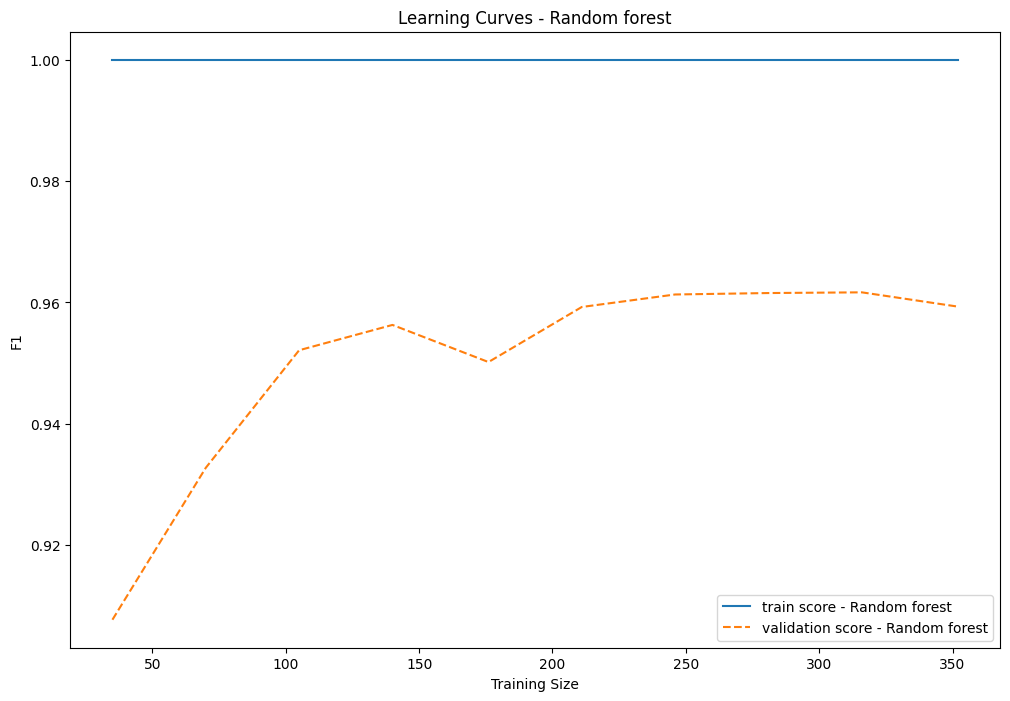

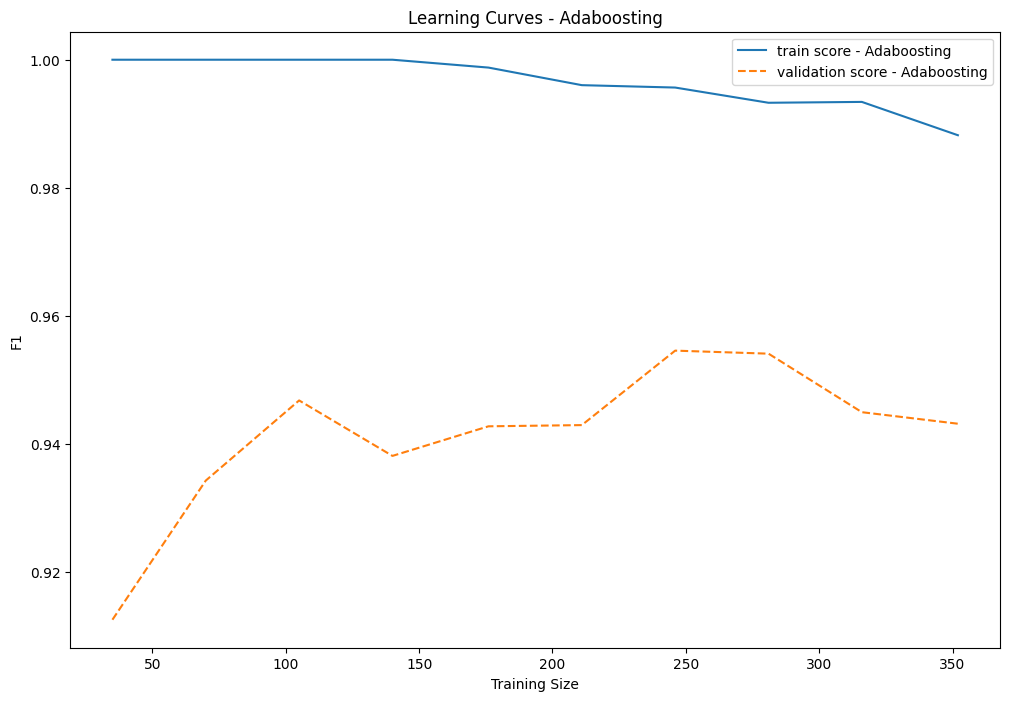

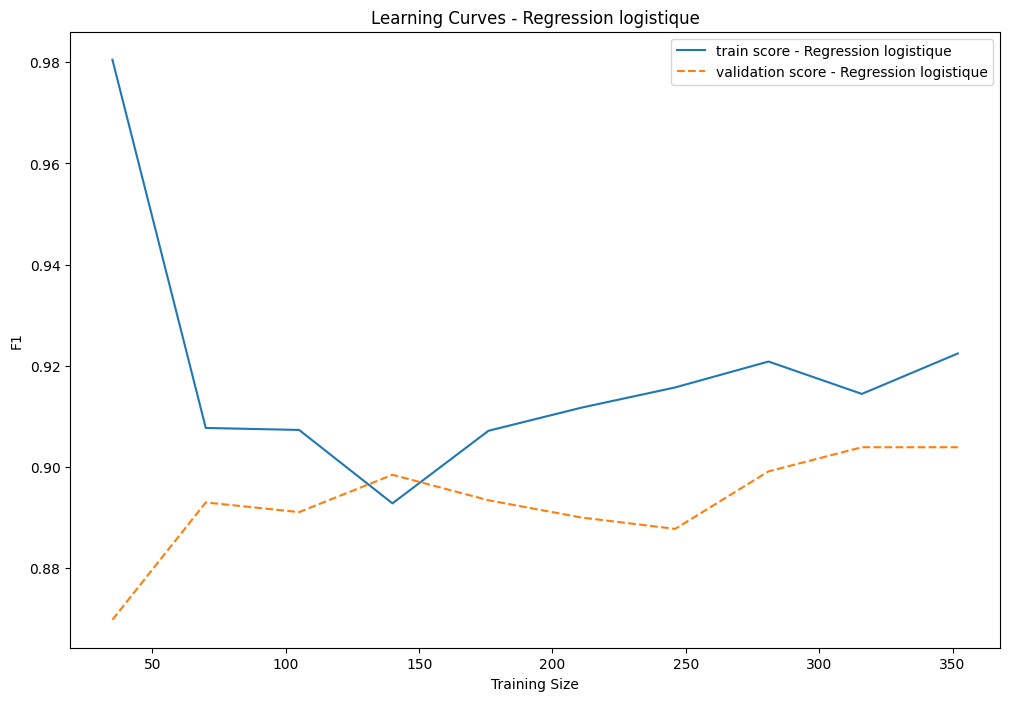

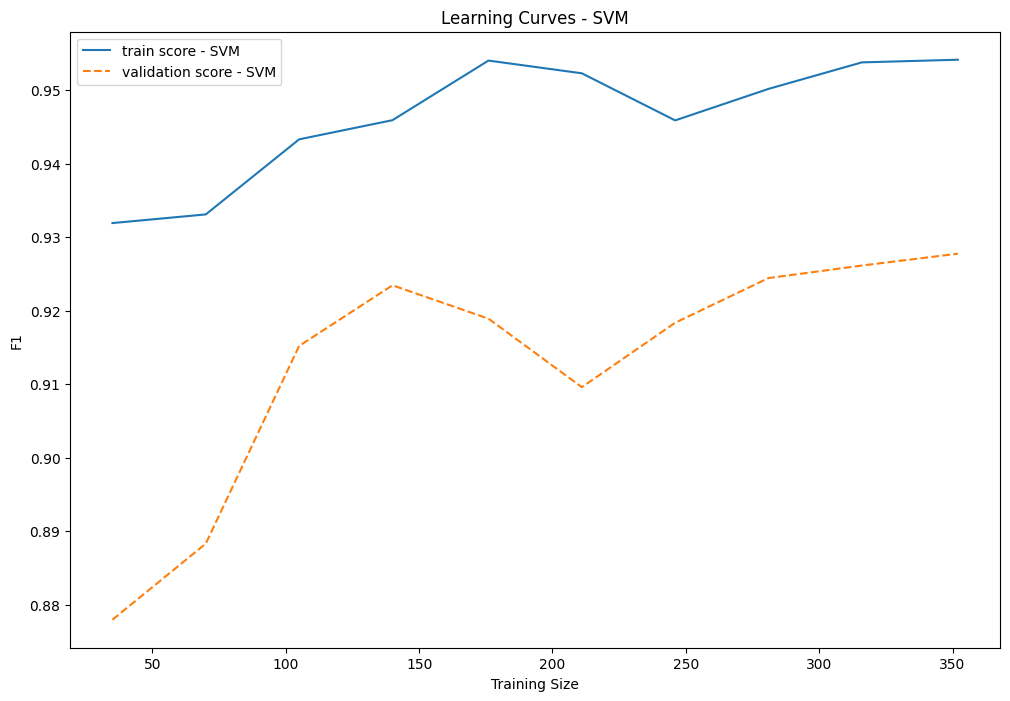

In [68]:
plot_learning_curves(models,X_r_train,y_r_train)

In [69]:
filename='best_model.LR.pkl'
pickle.dump(best_model_LR_equi,open(filename,'wb'))